For this Challenge we will [Cats Vs Dogs](https://www.kaggle.com/c/dogs-vs-cats) dataset to create a classifier using Tensroflow and keras. We will be building a classifier that can predict Cat vs Dog.

We will also take a look at Tensorflow **ImageGenerator** Libaray that can  we will use to create  Training and Validation Dataset.


## Download and Inspect the Dataset
You will start by downloading the dataset. This is a .zip of 2,000 JPG pictures of cats and dogs. It is a subset of the "Dogs vs. Cats" dataset available on Kaggle, which contains 25,000 images. You will only use 2,000 of the full dataset to decrease training time for educational purposes.

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


--2024-11-07 05:42:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 209.85.200.207, 173.194.206.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   277MB/s    in 0.2s    

2024-11-07 05:42:36 (277 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

#zip archive location
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()

zip_ref.close()

The contents of the `.zip` are extracted to the base directory `./cats_and_dogs_filtered`, which contains train and validation subdirectories for the training and validation datasets (you can ignore `vectorize.py` in the output in the next cell).

If you recall, the ``training set`` is the data that is used to tell the neural network model that 'this is what a cat looks like' and 'this is what a dog looks like'. The ``validation set`` is images of cats and dogs that the neural network will not see as part of the training. You can use this to test how well or how badly it does in evaluating if an image contains a cat or a dog. (See the Machine Learning Crash Course if you want a refresher on training, validation, and test sets.)

These subdirectories in turn each contain cats and dogs subdirectories.

In [4]:
import os

base_dir = 'cats_and_dogs_filtered'

print('Contents of base_directory:')
print(os.listdir(base_dir))

print('\nContensts of the train directory')
print(os.listdir(f'{base_dir}/train'))


print('\nContensts of the validation directory')
print(os.listdir(f'{base_dir}/validation'))


Contents of base_directory:
['validation', 'vectorize.py', 'train']

Contensts of the train directory
['dogs', 'cats']

Contensts of the validation directory
['dogs', 'cats']


In [5]:
import os

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')


#Directory with training cats/dogs pictures
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')


#Directory with Validation cats/dogs pictures
val_cats_dir = os.path.join(validation_dir,'cats')
val_dogs_dir = os.path.join(validation_dir,'dogs')


In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


print(train_cat_fnames)
print(train_dog_fnames)

['cat.870.jpg', 'cat.214.jpg', 'cat.629.jpg', 'cat.821.jpg', 'cat.393.jpg', 'cat.826.jpg', 'cat.740.jpg', 'cat.61.jpg', 'cat.666.jpg', 'cat.884.jpg', 'cat.867.jpg', 'cat.168.jpg', 'cat.897.jpg', 'cat.341.jpg', 'cat.225.jpg', 'cat.13.jpg', 'cat.962.jpg', 'cat.116.jpg', 'cat.286.jpg', 'cat.895.jpg', 'cat.128.jpg', 'cat.456.jpg', 'cat.584.jpg', 'cat.628.jpg', 'cat.386.jpg', 'cat.510.jpg', 'cat.607.jpg', 'cat.705.jpg', 'cat.514.jpg', 'cat.11.jpg', 'cat.950.jpg', 'cat.874.jpg', 'cat.193.jpg', 'cat.828.jpg', 'cat.87.jpg', 'cat.513.jpg', 'cat.127.jpg', 'cat.151.jpg', 'cat.6.jpg', 'cat.389.jpg', 'cat.976.jpg', 'cat.390.jpg', 'cat.149.jpg', 'cat.164.jpg', 'cat.536.jpg', 'cat.202.jpg', 'cat.557.jpg', 'cat.563.jpg', 'cat.187.jpg', 'cat.768.jpg', 'cat.397.jpg', 'cat.494.jpg', 'cat.742.jpg', 'cat.169.jpg', 'cat.492.jpg', 'cat.810.jpg', 'cat.855.jpg', 'cat.620.jpg', 'cat.665.jpg', 'cat.946.jpg', 'cat.736.jpg', 'cat.956.jpg', 'cat.921.jpg', 'cat.567.jpg', 'cat.593.jpg', 'cat.610.jpg', 'cat.714.jpg', 

In [7]:
print("Total Training cats Images:",len(os.listdir(train_cats_dir)))
print("Total Training dog Images:",len(os.listdir(train_dogs_dir)))



print("Total Validation cats Images:",len(os.listdir(val_cats_dir)))
print("Total Validation dog Images:",len(os.listdir(val_dogs_dir)))


Total Training cats Images: 1000
Total Training dog Images: 1000
Total Validation cats Images: 500
Total Validation dog Images: 500


Now we will look at some images in these directories


In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

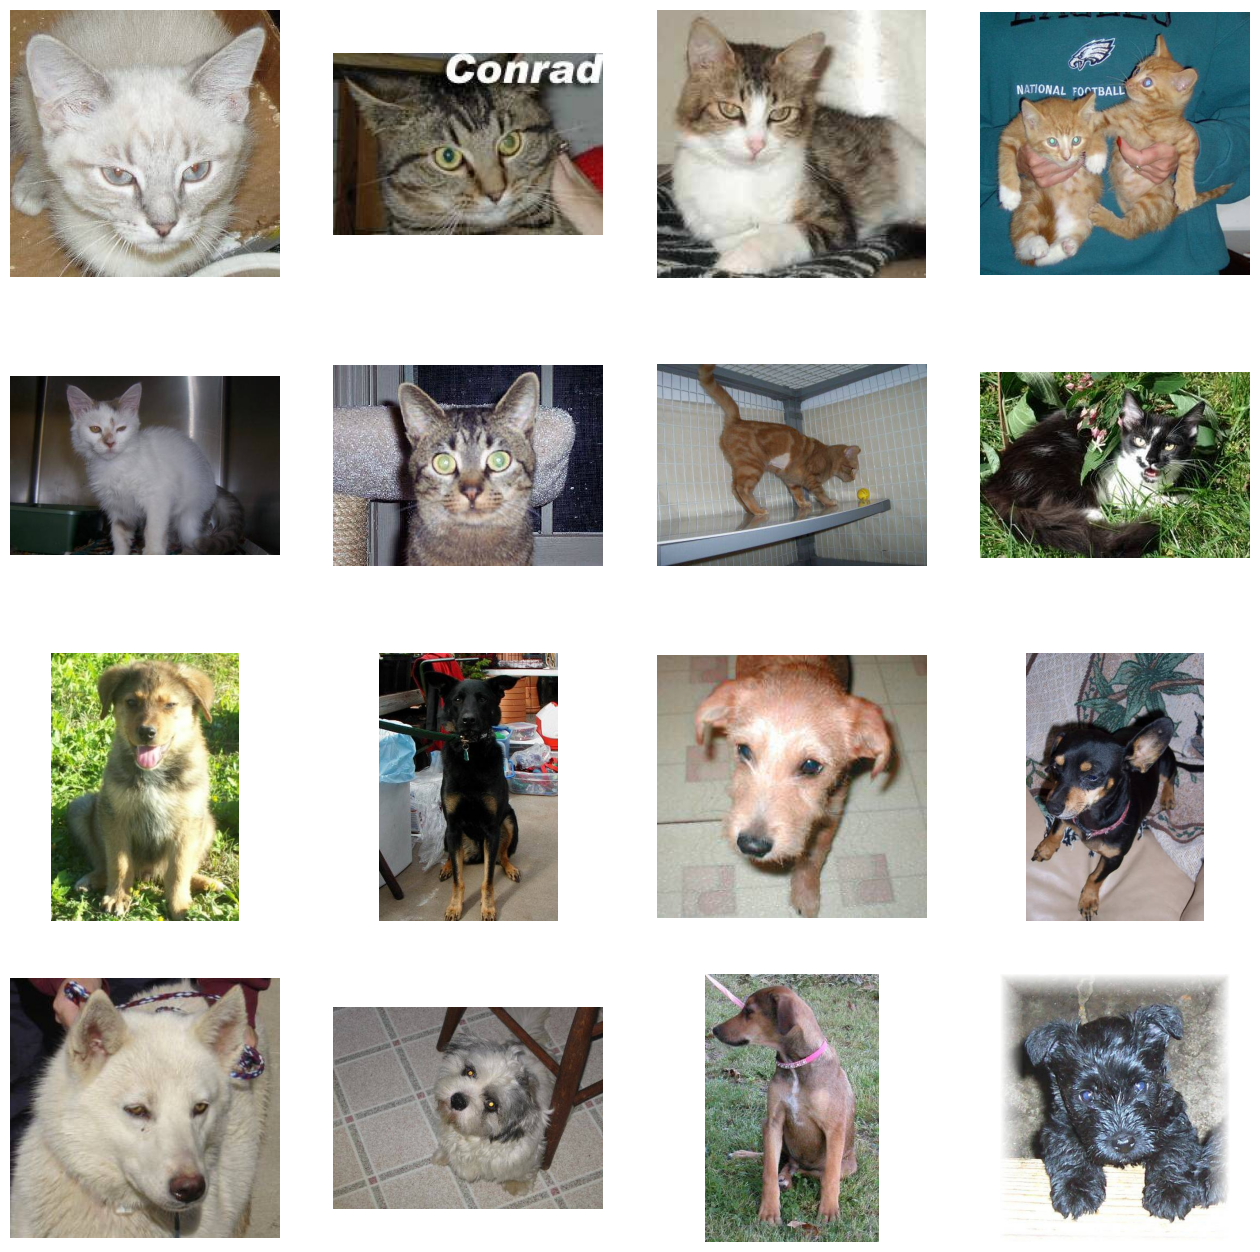

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a Small Model from Scratch to get to ~72% Accuracy
To train a neural network to handle the images, you'll need them to be in a uniform size. You will choose 150x150 pixels for this, and you'll see the code that preprocesses the images to that shape shortly.

You can define the model by importing Tensorflow and using the Keras API. Here is the entire code first then the discussion comes after. This is very similar to the models you have built in Course 1.



In [10]:
import tensorflow as tf
import keras


model = keras.models.Sequential([
        keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(150,150,3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(32,(3,3),activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64,(3,3),activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(512,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')

])

You defined a `Sequential layer` as before, adding some convolutional layers first. Note the input_shape parameter this time. Here is where you put the ``150x150`` size and `3` for the color depth because you have colored images. You then add a couple of convolutional layers and flatten the final result to feed into the densely connected layers.

Note that because you are facing a two-class classification problem, i.e. a binary classification problem, you will end the network with a sigmoid activation. The output of the network will be a single scalar between 0 and 1, encoding the probability that the current image is `class 1 `(as opposed to class 0).

You can review the architecture of the network with the model.summary() method:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

The output_shape column shows how the size of your feature map evolves in each successive layer. The convolution operation removes the outermost pixels from the original dimensions, and each pooling layer halves it.

Next, you'll configure the specifications for model training. You will train our model with the binary_crossentropy loss, because it's a binary classification problem and your final activation is a sigmoid. We will use the rmsprop optimizer with a learning rate of 0.001. During training, you will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [14]:
from keras.optimizers import RMSprop

model.compile(optimizer= keras.optimizers.RMSprop(learning_rate=0.01),
              loss = keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

## Data Preprocessing
Next step is to set up the data generators that will read pictures in the source folders, convert them to float32 tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [15]:
from keras.preprocessing.image import ImageDataGenerator


# All Images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)


#Flow Training images in batched of 20 using train datagen generator

train_generator =  train_datagen.flow_from_directory(train_dir,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                     target_size=(150,150))


#Flow Validation images in batches of 20 using test_datagetn generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                          batch_size =20,
                                                         class_mode = 'binary',
                                                         target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Training
You will now train on all 2,000 images available, for 15 epochs, and monitor the accuracy as well on the 1,000 images in the validation set.

Do note the values per epoch.

You'll see 4 values per epoch -- Loss, Accuracy, Validation Loss and Validation Accuracy.

The loss and accuracy are great indicators of progress in training. loss measures the current model prediction against the known labels, calculating the result. accuracy, on the other hand, is the portion of correct guesses.

In [16]:
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            validation_data=validation_generator,
            validation_steps=50,
            verbose=2
            )


Epoch 1/15
100/100 - 10s - loss: 7.8179 - accuracy: 0.4870 - val_loss: 0.6931 - val_accuracy: 0.5000 - 10s/epoch - 99ms/step
Epoch 2/15
100/100 - 9s - loss: 0.8948 - accuracy: 0.5030 - val_loss: 0.6933 - val_accuracy: 0.5000 - 9s/epoch - 85ms/step
Epoch 3/15
100/100 - 8s - loss: 0.6941 - accuracy: 0.4925 - val_loss: 0.6941 - val_accuracy: 0.5000 - 8s/epoch - 84ms/step
Epoch 4/15
100/100 - 8s - loss: 0.7067 - accuracy: 0.4985 - val_loss: 0.6936 - val_accuracy: 0.4980 - 8s/epoch - 84ms/step
Epoch 5/15
100/100 - 8s - loss: 0.7065 - accuracy: 0.4900 - val_loss: 0.6957 - val_accuracy: 0.5000 - 8s/epoch - 83ms/step
Epoch 6/15
100/100 - 8s - loss: 0.6937 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000 - 8s/epoch - 84ms/step
Epoch 7/15
100/100 - 9s - loss: 0.6946 - accuracy: 0.5135 - val_loss: 0.6938 - val_accuracy: 0.5000 - 9s/epoch - 86ms/step
Epoch 8/15
100/100 - 9s - loss: 0.6938 - accuracy: 0.4900 - val_loss: 0.6933 - val_accuracy: 0.5000 - 9s/epoch - 85ms/step
Epoch 9/15
100

##Model Prediction
Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a cat or a dog.

**Important Note**: Due to some compatibility issues, the following code block will result in an error after you select the images(s) to upload if you are running this notebook as a Colab on the Safari browser. For all other browsers, continue with the next code block and ignore the next one after it.

For Safari users: please comment out or skip the code block below, uncomment the next code block and run it.

In [17]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving istockphoto-1361394182-1024x1024.jpg to istockphoto-1361394182-1024x1024.jpg
1/1 [==============================] - 0s 101ms/step
[0.49751517]
istockphoto-1361394182-1024x1024.jpg is a cat
